In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [ ]:
df

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...
...,...
995,✅ Trip Verified | Aberdeen to Boston via Lond...
996,✅ Trip Verified | London to Hamburg. Baggage ...
997,✅ Trip Verified | Flew London Heathrow to Hong...
998,✅ Trip Verified | Flew to Istanbul with Britis...


In [ ]:
df

,reviews
0,Top Ten REASONS to not use British Airways To...
1,Easy check in on the way to Heathrow. The fl...
2,Online check in worked fine. Quick security ...
3,. The BA first lounge at Terminal 5 was a zoo...
4,Paid a quick visit to Nice yesterday from Hea...
...,...
995,Aberdeen to Boston via London Heathrow. I fo...
996,London to Hamburg. Baggage self-check-in was...
997,Flew London Heathrow to Hong Kong with Britis...
998,Flew to Istanbul with British Airways on 5th ...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...
1,Easy check in on the way to Heathrow. The fl...,Easy check in on the way to Heathrow The flig...
2,Online check in worked fine. Quick security ...,Online check in worked fine Quick security ch...
3,. The BA first lounge at Terminal 5 was a zoo...,The BA first lounge at Terminal was a zoo at ...
4,Paid a quick visit to Nice yesterday from Hea...,Paid a quick visit to Nice yesterday from Hea...


In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...,"[(Top, a), (Ten, n), (REASONS, n), (use, v), (..."
1,Easy check in on the way to Heathrow. The fl...,Easy check in on the way to Heathrow The flig...,"[(Easy, a), (check, n), (way, n), (Heathrow, v..."
2,Online check in worked fine. Quick security ...,Online check in worked fine Quick security ch...,"[(Online, n), (check, n), (worked, a), (fine, ..."
3,. The BA first lounge at Terminal 5 was a zoo...,The BA first lounge at Terminal was a zoo at ...,"[(BA, n), (first, a), (lounge, n), (Terminal, ..."
4,Paid a quick visit to Nice yesterday from Hea...,Paid a quick visit to Nice yesterday from Hea...,"[(Paid, v), (quick, a), (visit, n), (Nice, n),..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...,"[(Top, a), (Ten, n), (REASONS, n), (use, v), (...",Top Ten REASONS use British Airways Aware No...
1,Easy check in on the way to Heathrow. The fl...,Easy check in on the way to Heathrow The flig...,"[(Easy, a), (check, n), (way, n), (Heathrow, v...",Easy check way Heathrow flight time issue re...
2,Online check in worked fine. Quick security ...,Online check in worked fine Quick security ch...,"[(Online, n), (check, n), (worked, a), (fine, ...",Online check worked fine Quick security chec...
3,. The BA first lounge at Terminal 5 was a zoo...,The BA first lounge at Terminal was a zoo at ...,"[(BA, n), (first, a), (lounge, n), (Terminal, ...",BA first lounge Terminal zoo pm dirty table ...
4,Paid a quick visit to Nice yesterday from Hea...,Paid a quick visit to Nice yesterday from Hea...,"[(Paid, v), (quick, a), (visit, n), (Nice, n),...",Paid quick visit Nice yesterday Heathrow Dec...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS use British Airways Aware No...
1,Easy check in on the way to Heathrow. The fl...,Easy check way Heathrow flight time issue re...
2,Online check in worked fine. Quick security ...,Online check worked fine Quick security chec...
3,. The BA first lounge at Terminal 5 was a zoo...,BA first lounge Terminal zoo pm dirty table ...
4,Paid a quick visit to Nice yesterday from Hea...,Paid quick visit Nice yesterday Heathrow Dec...
...,...,...
995,Aberdeen to Boston via London Heathrow. I fo...,Aberdeen Boston via London Heathrow find sea...
996,London to Hamburg. Baggage self-check-in was...,London Hamburg Baggage self check diabolical...
997,Flew London Heathrow to Hong Kong with Britis...,Flew London Heathrow Hong Kong British Airwa...
998,Flew to Istanbul with British Airways on 5th ...,Flew Istanbul British Airways th June passpo...


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...,"[(Top, a), (Ten, n), (REASONS, n), (use, v), (...",Top Ten REASONS use British Airways Aware No...,0.6917,Positive
1,Easy check in on the way to Heathrow. The fl...,Easy check in on the way to Heathrow The flig...,"[(Easy, a), (check, n), (way, n), (Heathrow, v...",Easy check way Heathrow flight time issue re...,0.4939,Neutral
2,Online check in worked fine. Quick security ...,Online check in worked fine Quick security ch...,"[(Online, n), (check, n), (worked, a), (fine, ...",Online check worked fine Quick security chec...,0.8360,Positive
3,. The BA first lounge at Terminal 5 was a zoo...,The BA first lounge at Terminal was a zoo at ...,"[(BA, n), (first, a), (lounge, n), (Terminal, ...",BA first lounge Terminal zoo pm dirty table ...,-0.8445,Negative
4,Paid a quick visit to Nice yesterday from Hea...,Paid a quick visit to Nice yesterday from Hea...,"[(Paid, v), (quick, a), (visit, n), (Nice, n),...",Paid quick visit Nice yesterday Heathrow Dec...,0.9504,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    521
Negative    373
Neutral     106
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f674c294a60>,
 [Text(-0.07251825311279125, 1.0976069893023956, 'Positive'),
  Text(-0.29026018409844623, -1.0610132070465175, 'Negative'),
  Text(1.039569434610766, -0.359576682535245, 'Neutral')],
 [Text(-0.03955541078879523, 0.5986947214376703, '52.1%'),
  Text(-0.15832373678097067, -0.5787344765708277, '37.3%'),
  Text(0.5670378734240541, -0.19613273592831545, '10.6%')])

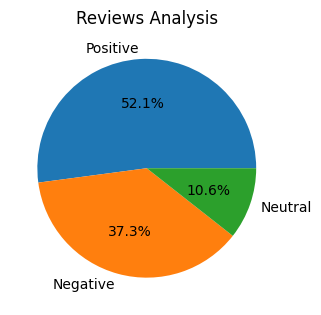

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

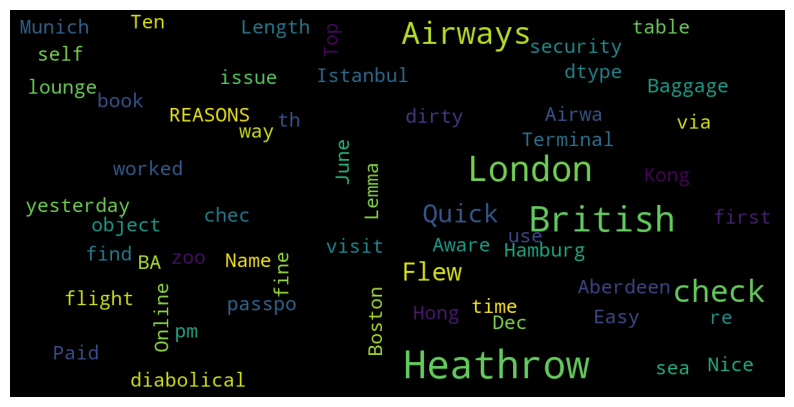

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=20,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)